# Deep Learning ISD

## 1. Auteurs et liens

| Nom  | Prénom | Courriel | Groupe | Github |
| :-------------: | :-------------: | :-------------: | :-------------: | :-------------: |
| AIT BELKACEM  | Moncef Karim  | moncef.ait-belkacem@universite-paris-saclay.fr  | LDDIM2  |<a href="https://github.com/MK8BK">MK8BK</a>|
| Tran--Guery | Thimoté | thimote.tran--guery@universite-paris-saclay.fr  | LDDIM2  |<a href="https://github.com/Thimote91">Thimote91</a>|

[Repositoire GitHub du projet](https://github.com/MK8BK/Deep_Learning_ISD)

## 2. Introduction
Ceci est le projet final de l'UE <a href="https://nicolas.thiery.name/Enseignement/IntroScienceDonnees/">Initiation à la Science des Données</a> offert en L1-S2 à l'Université Paris-Saclay.

Il s'agit d'un classificateur de caractères hexadécimaux manuscrits en python.

Plus précisément, c’est une implémentation d’un réseau neuronal, visant la prédiction de caractères manuscrits de `0-9/A-F` (16 classes),

dans le data set `EMNIST`.

On utilise pour cela le module de calcul numérique `numpy`, le module de visualisation `matplotlib` et le module de traitement d'image `PIL`.

(En outre des modules suivants de la librairie standard python : `os`, `random`, `pickle`, `typing`)

## 3. Aspects Théoriques 

A completer ...

...

...

...

...

partie math latex

## 4. Détails de l'implémentation 

L'outil principal à notre disposition est l'objet np.array du module `numpy` .

Toute référence au mot matrice est en fait un 2d np.array (np.matrix ne se prête pas à la tâche) .


### 4.1 Set de données

On dispose de `38400` images, reparties en `16` classes, soit `2400` images par classe.

Chaque image est au format `jpeg`.

Ces fichiers sont dans le dossier `./EMNIST_DATA_SET/{classe de l'image}/{nom de l'image}.jpeg`.

De plus chaque image contient sa classe en premier caractère.


<img src="./EMNIST_DATA_SET/0/0_char_102479.jpeg"  width=56 style="float: left"/>
<img src="./EMNIST_DATA_SET/1/1_char_16442.jpeg"  width=56 style="float: left"/>
<img src="./EMNIST_DATA_SET/2/2_char_7136.jpeg"  width=56 style="float: left"/>
<img src="./EMNIST_DATA_SET/3/3_char_55992.jpeg"  width=56 style="float: left"/>
<img src="./EMNIST_DATA_SET/4/4_char_80661.jpeg"  width=56 style="float: left"/>
<img src="./EMNIST_DATA_SET/5/5_char_73026.jpeg"  width=56 style="float: left"/>
<img src="./EMNIST_DATA_SET/6/6_char_19045.jpeg"  width=56 style="float: left"/>
<img src="./EMNIST_DATA_SET/7/7_char_107973.jpeg"  width=56 style="float: left"/>
<img src="./EMNIST_DATA_SET/8/8_char_22810.jpeg"  width=56 style="float: left"/>
<img src="./EMNIST_DATA_SET/9/9_char_110343.jpeg"  width=56 style="float: left"/>
<img src="./EMNIST_DATA_SET/A/A_char_4502.jpeg"  width=56 style="float: left"/>
<img src="./EMNIST_DATA_SET/B/B_char_9251.jpeg"  width=56 style="float: left"/>
<img src="./EMNIST_DATA_SET/C/C_char_15156.jpeg"  width=56 style="float: left"/>
<img src="./EMNIST_DATA_SET/D/D_char_35808.jpeg"  width=56 style="float: left"/>
<img src="./EMNIST_DATA_SET/E/E_char_712.jpeg"  width=56 style="float: left"/>
<img src="./EMNIST_DATA_SET/F/F_char_99118.jpeg" width=56 style="float: left"/>
<div style="clear: both"></div>

Par exemple : `./EMNIST_DATA_SET/0/0_char_102479.jpeg` est le path vers la première image (celle du 0)

### 4.2 Modularité

Notre implémentation de Deep Learning se décompose en 6 fichiers situes dans le dossier `./src/` :
 - `LoadData.py`
 - `Functions.py`
 - `Layers.py`
 - `NeuralNetwork.py`
 - `Utilities.py`

Importons ces six fichiers :

In [1]:
from src.LoadData import *
from src.Functions import *
from src.Layers import *
from src.NeuralNetwork import *
from src.Utilities import *

Utilisons la fonction `show_source()` définie dans `./src/Utilities.py` afin d'observer en détails les objets qui seront manipulés par la suite.

### 4.3 `LoadData`

In [2]:
#Global list[str] of classes(single characters)
print(CLASSES)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F']


In [3]:
help(char_to_label)

Help on function char_to_label in module src.LoadData:

char_to_label(character: str) -> int
    Convert the character representation of the class into its integer representation
    @param: character: str , has to be in the global defined classes
    @return: the integer representation of said character



In [4]:
help(label_to_char)

Help on function label_to_char in module src.LoadData:

label_to_char(label: int) -> str
    Convert the integer representation of the class into its character representation
    @param: label: int , has to be a valid index of the global defined classes
    @return: the character representation of said integer



In [5]:
help(load_pil_image)

Help on function load_pil_image in module src.LoadData:

load_pil_image(str_path: str) -> <module 'PIL.Image' from 'C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\PIL\\Image.py'>
    Returns a grayscale PIL image given the full relative str_path
    @param: str_path: the full relative str_path to the image file
    @return: im: a PIL Image object (single channel: grayscale)



In [6]:
help(load_numpy_image)

Help on function load_numpy_image in module src.LoadData:

load_numpy_image(str_path: str) -> <built-in function array>
    Returns the flattened numpy representation of an image 
                        given the full relative str_path
    @param: str_path: the full relative str_path to the image file
    @return: im: a normalized np.array of dimensions (h*w,1)



In [7]:
help(make_input_matrix)

Help on function make_input_matrix in module src.LoadData:

make_input_matrix(samples: list) -> <built-in function array>
    Returns the matrix representation of s samples
    @param: samples: a list of flattened np.array 's, 
                    each representing a sample image
    @return: input_matrix: a matrix (2d np.array) containing one sample per column,
                                     1 feature(pixel value) per row



In [8]:
help(make_labels)

Help on function make_labels in module src.LoadData:

make_labels(filenames: list) -> <built-in function array>
    Returns the class label for each image filename in filenames
    @param: filenames: a list of strings, relative str_paths to files
    @return: labels: a list of int labels : the class of each file



In [9]:
help(make_labels_matrix)

Help on function make_labels_matrix in module src.LoadData:

make_labels_matrix(labels: list, classes: list = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F']) -> <built-in function array>
    Returns the matrix representation of the labels, 
                        given a list of char labels
    @param: labels: a list of strings, filepaths
    @return: labels_matrix: a 2 np.array of 16 rows, each column is an image



In [10]:
help(make_random_batch)

Help on function make_random_batch in module src.LoadData:

make_random_batch(path: str, batch_size: int, classes: list, equilibrium: bool = True) -> list
    Returns a list of filenames randomly, equal per class or not
    @param: path: the path to the data_set folder
    @param: batch_size: the number of images in the batch
    @param: classes: a list of str representations of the classes
    @param: equilibrium: a bool, wether or not to equalize images per class
    @return: batch: a list of strings, 
            the paths to the randomly selected images



In [11]:
help(load_training_set)

Help on function load_training_set in module src.LoadData:

load_training_set(path_str: str, batch_size: int, classes: list, equilibrium: bool = True) -> tuple
    Returns a training input and labels matrices randomly, 
                                    equal per class or not
    @param: path: the path to the data_set folder
    @param: batch_size: the number of images in the batch
    @param: classes: a list of str representations of the classes
    @param: equilibrium: a bool, wether or not to equalize images per class
    @return: batch: X: an input matrix of shape (784,batch_size) 
                    Y: a corresponding labels matrix of shape (16, batch_size)



In [12]:
help(load_prediction_image)

Help on function load_prediction_image in module src.LoadData:

load_prediction_image(path_str)
    Loads a single image located at path_str
    @param: path_str: relative path to the image
    @return: x: a 784x1 input matrix
             im: PIL representation of the image



In [13]:
help(load_data_set)

Help on function load_data_set in module src.LoadData:

load_data_set(path_str)
    Loads entire data set at path_str
    @param: path_str: root path of data_set
    @return: X: an imput matrix of shape (784, 38400)
             Y: a labels matrix of shape (16, 38400)



### 4.4 `Functions`

In [35]:
#hsite entre utiliser help ou getsource

print(inspect.getsource(Activation))

class Activation:
    """
        Abstract Activation class
    """
    def __init__(self, fn, dfn):
        #forward pass function
        self.fn = fn
        #backward pass function (derivative of forward pass)
        self.dfn = dfn

    def forward(self, x):
        #apply forward pass function to input matrix
        return self.fn(x)

    def backward(self, x):
        #apply backward pass function to input grad
        return self.dfn(x)



In [40]:
help(ReLu)

Help on Activation in module src.Functions object:

class Activation(builtins.object)
 |  Activation(fn, dfn)
 |  
 |  Abstract Activation class
 |  attributes:
 |      self.fn
 |  
 |  Methods defined here:
 |  
 |  __init__(self, fn, dfn)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  backward(self, x)
 |  
 |  forward(self, x)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



### 4.5 `Layers`

### 4.6 `NeuralNetwork`

### 4.7 `Utilities`

## 5. Démonstration


### 5.1 Entrainement

#### 5.1.1 Entrainement et test sur les memes mini_batch

In [33]:
#settings
accuracies = [0]
costs = []
batch_size = 64
lr = 2
epochs = 1200
SCE = SoftmaxCrossEntropyLoss()
layers = [DenseActivatedLayer(112, 784, ReLu), OutputLayer(16, 112, SCE)]
nn = NeuralNetwork(layers)

In [34]:
#Training
%time
for i in range(epochs):
    x, y = load_training_set("./EMNIST_DATA_SET/", batch_size=batch_size, classes=CLASSES, equilibrium=True)
    res = nn.forward(x)
    nn.backward(y)
    accuracy = percent_good(res, y)
    cost = compute_cost(res, y)
    accuracies.append(accuracy)
    costs.append(cost)
    if i%30==0:
        print(f"Iteration: {i:4} | Accuracy: {accuracy} %")

CPU times: total: 0 ns
Wall time: 0 ns
Iteration:    0 | Accuracy: 6.25 %
Iteration:   30 | Accuracy: 51.5625 %
Iteration:   60 | Accuracy: 73.4375 %
Iteration:   90 | Accuracy: 76.5625 %
Iteration:  120 | Accuracy: 79.6875 %
Iteration:  150 | Accuracy: 79.6875 %
Iteration:  180 | Accuracy: 84.375 %
Iteration:  210 | Accuracy: 79.6875 %
Iteration:  240 | Accuracy: 87.5 %
Iteration:  270 | Accuracy: 92.1875 %
Iteration:  300 | Accuracy: 89.0625 %
Iteration:  330 | Accuracy: 79.6875 %
Iteration:  360 | Accuracy: 89.0625 %
Iteration:  390 | Accuracy: 90.625 %
Iteration:  420 | Accuracy: 93.75 %
Iteration:  450 | Accuracy: 87.5 %
Iteration:  480 | Accuracy: 96.875 %
Iteration:  510 | Accuracy: 81.25 %
Iteration:  540 | Accuracy: 89.0625 %
Iteration:  570 | Accuracy: 93.75 %
Iteration:  600 | Accuracy: 92.1875 %
Iteration:  630 | Accuracy: 93.75 %
Iteration:  660 | Accuracy: 85.9375 %
Iteration:  690 | Accuracy: 96.875 %
Iteration:  720 | Accuracy: 93.75 %
Iteration:  750 | Accuracy: 95.312

In [30]:
import matplotlib.pyplot as plt
import matplotlib.axes as axes

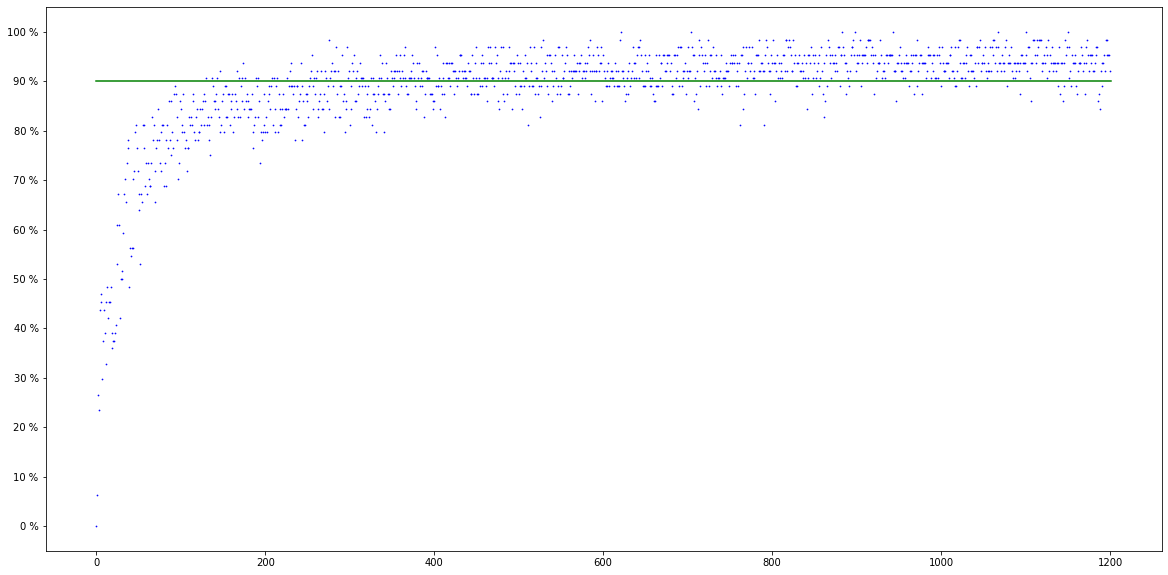

In [38]:
plt.scatter(list(range(epochs+1)), accuracies, s=0.5, color="blue")#s=1
yticks = [str(i)+" %" for i in range(0,101,10)]
plt.yticks(list(range(0,101,10)), yticks)
plt.scatter([0],[100], s=0.000001)
plt.plot([0,epochs+1],[90,90], color="green")
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

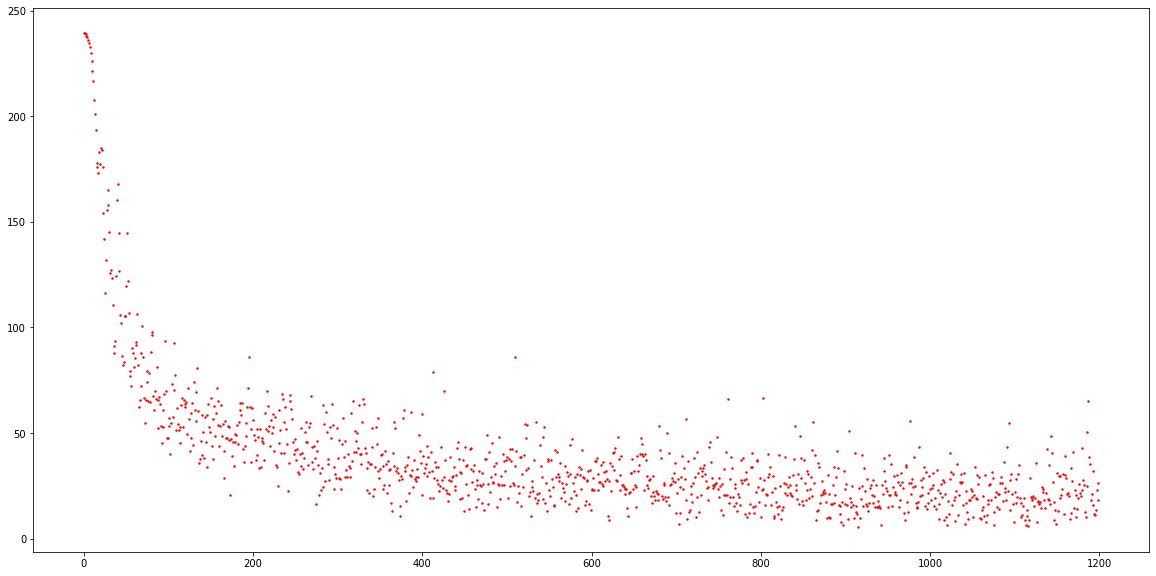

In [39]:
plt.scatter(list(range(0,epochs)), costs, color="red", s=2)
plt.show()

In [46]:
del nn, layers

#### 5.1.2 Entrainement sur mini_batch , test sur tout le data set

In [63]:
#settings
accuracies2 = [0]
costs2 = []
batch_size = 64
lr = 2
epochs = 1200
SCE = SoftmaxCrossEntropyLoss()
layers2 = [DenseActivatedLayer(112, 784, ReLu), OutputLayer(16, 112, SCE)]
nn2 = NeuralNetwork(layers2)
#X, Y = load_data_set("./EMNIST_DATA_SET/")

In [61]:
del nn2, layers2

NameError: name 'nn2' is not defined

In [64]:
#Training
%time
for i in range(epochs):
    x, y = load_training_set("./EMNIST_DATA_SET/", batch_size=batch_size, classes=CLASSES, equilibrium=True)
    res = nn2.forward(x)
    nn2.backward(y)
#   percent = percent_good(res, Y)
#   cost = compute_cost(res, Y)
    if i%30==0:
        pred = nn2.forward(X)
        accuracy = percent_good(pred, Y)
        cost = compute_cost(pred, Y)
        accuracies2.append(accuracy)
        costs2.append(cost)
        print(f"Iteration: {i:4} | Accuracy: {accuracy} %")

CPU times: total: 0 ns
Wall time: 0 ns
Iteration:    0 | Accuracy: 19.354166666666668 %
Iteration:   30 | Accuracy: 59.450520833333336 %
Iteration:   60 | Accuracy: 78.21875 %
Iteration:   90 | Accuracy: 81.4375 %
Iteration:  120 | Accuracy: 84.1875 %
Iteration:  150 | Accuracy: 85.13020833333333 %
Iteration:  180 | Accuracy: 87.27864583333333 %


KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (41,) and (1246,)

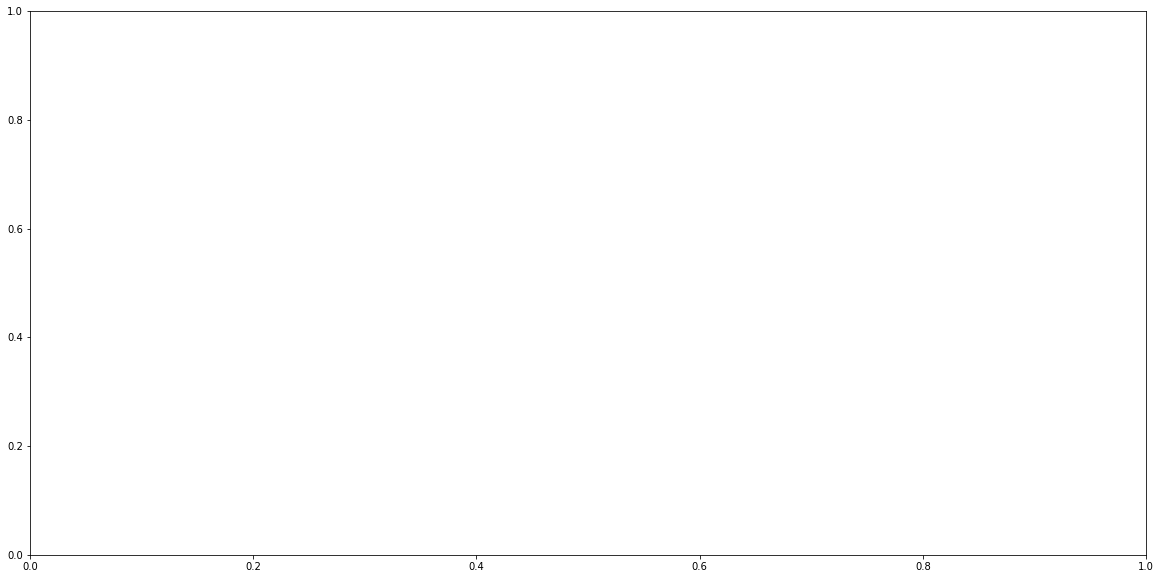

In [49]:
plt.plot(list(range(0,epochs+1, 30)), accuracies)#s=1
yticks = [str(i)+" %" for i in range(0,101,10)]
plt.yticks(list(range(0,101,10)), yticks)
plt.scatter([0],[100], s=0.1)
plt.plot([0,epochs+1],[90,90], color="red")
plt.rcParams["figure.figsize"] = (20,15)
plt.show()

In [ ]:
plt.scatter(list(range(0,epochs, 30)), costs, color="red", s=10)
plt.show()

#### 5.1.2 Entrainement et test sur tout le dataset

### 5.2 Exemple concret

In [ ]:
batch = make_random_batch("./EMNIST_DATA_SET/", 32, CLASSES, equilibrium=True)
imgs = [load_pil_image(f) for f in batch]
l = image_grid(imgs, titles=[" "]*len(batch))
l

In [ ]:
res = []
for i in range(len(batch)): 
    x, im = load_prediction_image(batch[i])
    p = nn.forward(x)
    res.append(predicted_labels(p)[0])
image_grid(imgs, titles=res)
#print(res)

sauvegarde du models

In [ ]:
import pickle


## 6. Applications

## 7.Ouverture et extensions possibles

Utile mais pas encore note

In [ ]:
print(inspect.getsource(load_pil_image))